In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from Stock import Stock
%load_ext autoreload
%autoreload 2

In [10]:
from Model import Model


In [11]:
name = "COKE"
data = yf.download(tickers = name,period = '15d')


[*********************100%***********************]  1 of 1 completed


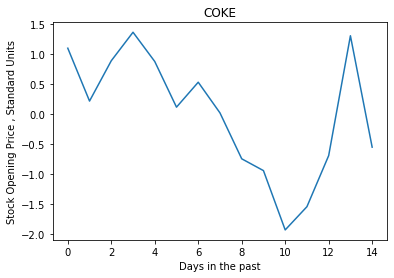

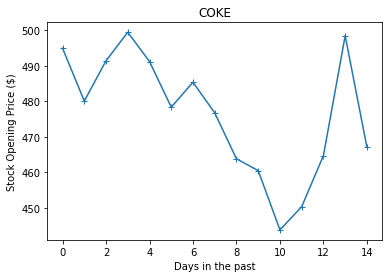

In [12]:
#plt.plot(data['Open'])

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.title(name)
plt.xlabel("Days in the past") #re-write this to be dates
plt.ylabel("Stock Opening Price , Standard Units")
plt.plot(X)
plt.show()

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.title(name)
plt.xlabel("Days in the past") #re-write this to be dates
plt.ylabel("Stock Opening Price ($)")
plt.plot(arr,"-+")

In [43]:
out_aapl = np.array(X).reshape(1,len(X),1)
inp_aapl = np.linspace(0,len(X),len(X)).reshape(1,len(X),1)

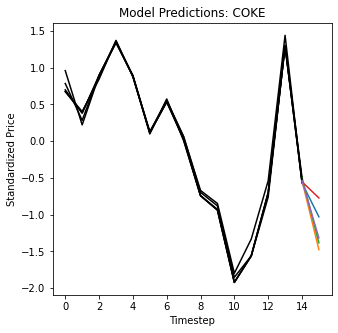

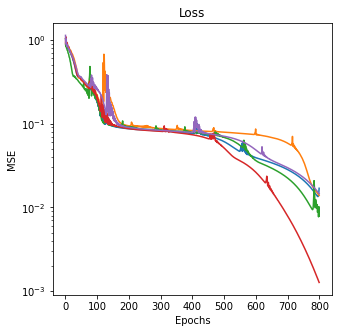

In [14]:
# NOTE: the input prices are in a very naive form now. Simply the oppening prices per day.
# Current inputs are purely for testing of class.
stck = Stock(arr,5,epochs = 800, stockname = "COKE")
stck.run()

stck.plot_predictions()
stck.plot_losses()

15